# Pymaceuticals Inc.
---

### Analysis

- Ramicane and Capomulin both show promise as tumor reducing drugs. Both drugs were effective in reducing the volume of the tumor.
- Infubinol and Ceftamin are not effective at reducing the tumor volume. 
- The weight of a mouse and the volume of the tumor show a moderate correlation, with a significant p-value.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Check the number of mice.
length = len(df["Mouse ID"].unique())

length

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df.duplicated(keep=False)]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.set_index("Mouse ID")
clean_df = clean_df.drop(labels="g989")
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [53]:
# Checking the number of mice in the clean DataFrame.
length_clean = len(clean_df.index.unique())

length_clean

248

## Summary Statistics

In [54]:
# Calculate mean, median, variance, standard deviation, SEM
reg_avg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_med = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Display calculations in summary
reg_summary = pd.DataFrame({"Mean":reg_avg,
                            "Median":reg_med,
                            "Variance":reg_var,
                            "Standard Deviation":reg_std,
                            "SEM":reg_sem})
reg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

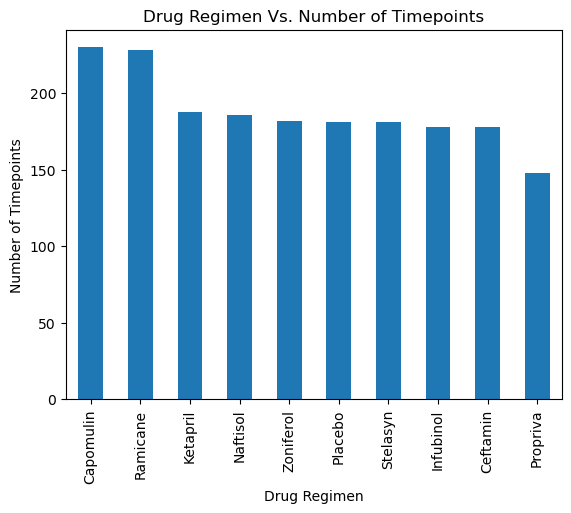

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
reg_count = clean_df["Drug Regimen"].value_counts()
reg_count

fig1 = reg_count.plot.bar(title="Drug Regimen Vs. Number of Timepoints")
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

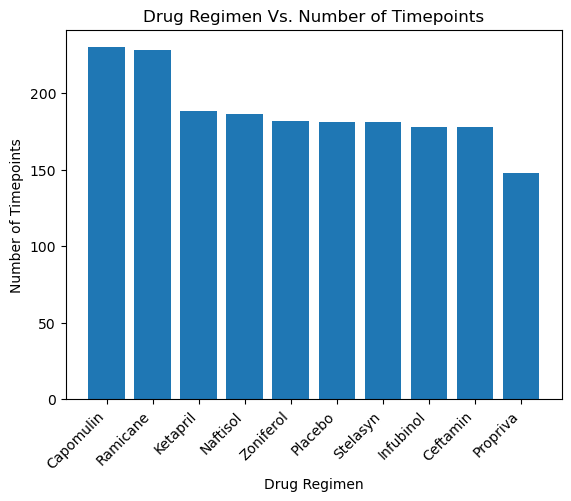

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=reg_count.index
y=reg_count
ticks = [value for value in x]

plt.bar(x,y)
plt.xticks(ticks,rotation=45,ha="right")
plt.title("Drug Regimen Vs. Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, '')

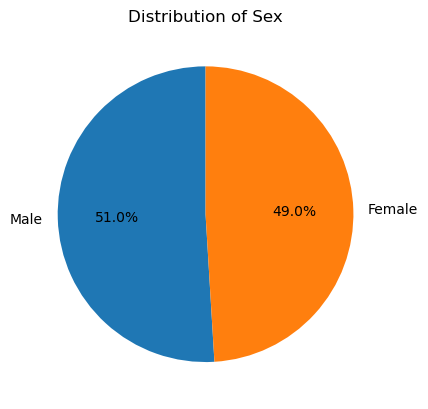

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df["Sex"].value_counts()
fig2 = sex_count.plot.pie(title="Distribution of Sex",autopct="%1.1f%%",startangle=90)
fig2.set_ylabel("")

Text(0.5, 1.0, 'Distribution of Sex')

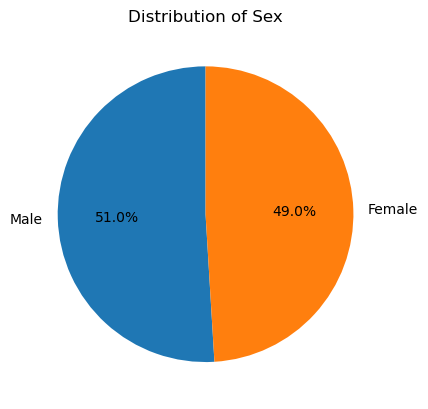

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x=sex_count.index
y=sex_count
plt.pie(y,labels=x,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of Sex")


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
new_df = clean_df.groupby(["Mouse ID"]).tail(1)
new_df = new_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [60]:
# Treatments list
reg_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = new_df["Tumor Volume (mm3)"]


In [61]:
# New data frames for each drug regimen
ramicane = new_df.loc[new_df["Drug Regimen"]=="Ramicane"]
capomulin = new_df.loc[new_df["Drug Regimen"]=="Capomulin"]
infubinol = new_df.loc[new_df["Drug Regimen"]=="Infubinol"]
ceftamin = new_df.loc[new_df["Drug Regimen"]=="Ceftamin"]

# Calculations for IQR
# Ramicane
ramq1 = np.quantile(ramicane["Tumor Volume (mm3)"],0.25)
ramq3 = np.quantile(ramicane["Tumor Volume (mm3)"],0.75)
ramiqr = ramq3-ramq1
ram_upper = ramq3 + (1.5 * ramiqr)
ram_lower = ramq1 - (1.5 * ramiqr)
ram = ramicane["Tumor Volume (mm3)"]
# Capomulin
capq1 = np.quantile(capomulin["Tumor Volume (mm3)"],0.25)
capq3 = np.quantile(capomulin["Tumor Volume (mm3)"],0.75)
capiqr = capq3-capq1
cap_upper = capq3 + (1.5 * capiqr)
cap_lower = capq1 - (1.5 * capiqr)
cap = capomulin["Tumor Volume (mm3)"]
# Infubinol
infq1 = np.quantile(infubinol["Tumor Volume (mm3)"],0.25)
infq3 = np.quantile(infubinol["Tumor Volume (mm3)"],0.75)
infiqr = infq3-infq1
inf_upper = infq3 + (1.5 * infiqr)
inf_lower = infq1 - (1.5 * infiqr)
inf = infubinol["Tumor Volume (mm3)"]
# Ceftamin
cefq1 = np.quantile(ceftamin["Tumor Volume (mm3)"],0.25)
cefq3 = np.quantile(ceftamin["Tumor Volume (mm3)"],0.75)
cefiqr = cefq3-cefq1
cef_upper = cefq3 + (1.5 * cefiqr)
cef_lower = cefq1 - (1.5 * cefiqr)
cef = ceftamin["Tumor Volume (mm3)"]



In [62]:
# Loops to check for outliers
# Ramicane
for i in range(len(ramicane)):
    if ramicane.iloc[i,6]<=ram_lower or ramicane.iloc[i,6]>=ram_upper:
        print(ramicane.iloc[i,0])
# Capomulin
for i in range(len(capomulin)):
    if capomulin.iloc[i,6]<=cap_lower or capomulin.iloc[i,6]>=cap_upper:
        print(capomulin.iloc[i,0])
# Infubinol
for i in range(len(infubinol)):
    if infubinol.iloc[i,6]<=inf_lower or infubinol.iloc[i,6]>=inf_upper:
        print(infubinol.iloc[i,0])
# Ceftamin
for i in range(len(ceftamin)):
    if ceftamin.iloc[i,6]<=cef_lower or ceftamin.iloc[i,6]>=cef_upper:
        print(ceftamin.iloc[i,0])        


c326


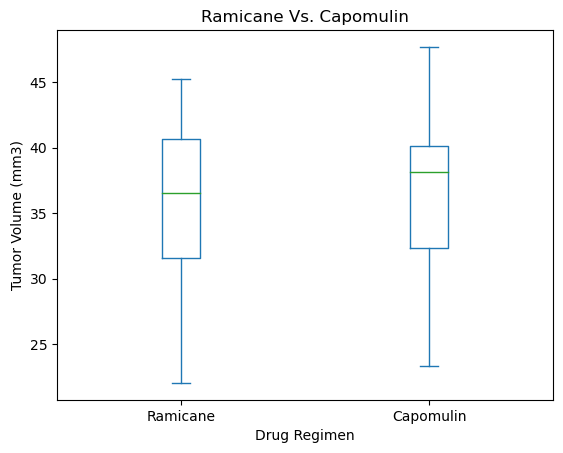

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Ramicane and Capomulin boxplot
ram_cap = pd.DataFrame({"Ramicane":ram,"Capomulin":cap})
ram_cap_box = ram_cap[["Ramicane","Capomulin"]].plot(kind="box",title="Ramicane Vs. Capomulin",ylabel="Tumor Volume (mm3)",xlabel="Drug Regimen")



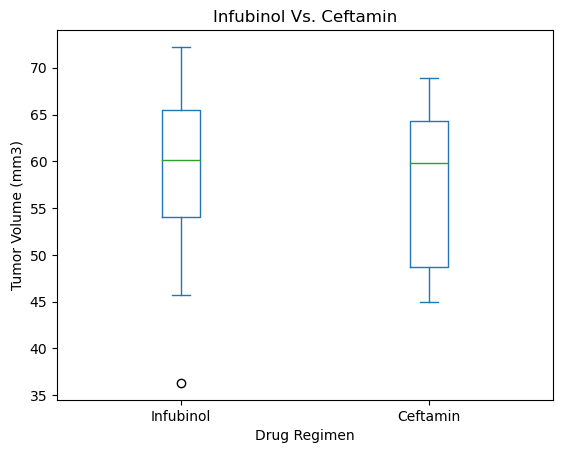

In [64]:
# Infubinol and Ceftamin boxplot
inf_cef = pd.DataFrame({"Infubinol":inf,"Ceftamin":cef})
inf_cef_box = inf_cef[["Infubinol","Ceftamin"]].plot(kind="box",title="Infubinol Vs. Ceftamin",ylabel="Tumor Volume (mm3)",xlabel="Drug Regimen")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

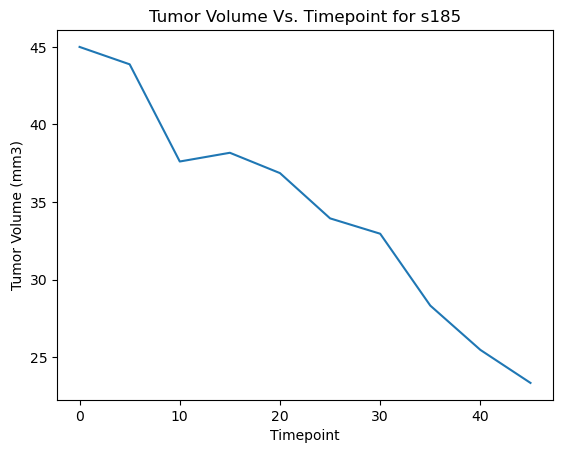

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = clean_df.loc[clean_df.index=="s185"]

# Line plot
x=cap_mouse["Timepoint"]
y=cap_mouse["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title("Tumor Volume Vs. Timepoint for s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


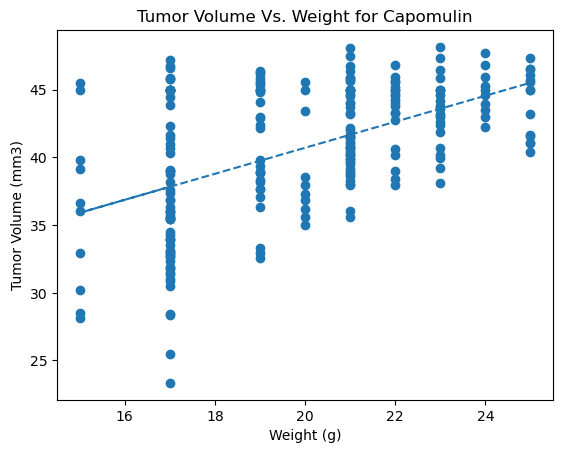

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_data = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

# Scatter plot
x=cap_data["Weight (g)"]
y=cap_data["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.title("Tumor Volume Vs. Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Regression line
slope,int,r,p,std = st.linregress(x,y)
fit = slope * x + int
plt.plot(x,fit,"--")


## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
r,p = st.pearsonr(x,y)

display(f"The r value for mouse weight vs tumor volume for the capomulin drug regimen is {round(r,2)}, with a p value of {p}")

'The r value for mouse weight vs tumor volume for the capomulin drug regimen is 0.53, with a p value of 9.60544662950128e-18'